세 가지 예제인 영화 리뷰 예측, 토픽 분류, 주택 가격 회귀 모두 홀드아웃 데이터에서 모델의 성능이 몇 번의 에포크 후에 최고치에 다다랐다가 감소되기 시작했습니다. 즉, 모델이 금방 훈련 데이터에 과대적합되기 시작합니다. 과대적합은 모든 머신 러닝 문제에서 발생합니다. 머신 러닝을 마스터하려면 과대적합을 다루는 방법을 꼭 배워야 합니다.

머신 러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기입니다. 최적화는 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정입니다(머신 러닝의 학습). 반면 일반화는 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지를 의미합니다. 물론 모델을 만드는 목적은 좋은 일반화 성능을 얻는 것입니다. 하지만 일반화 성능을 제어할 방법이 없습니다. 단지 훈련 데이터를 기반으로 모델을 조정할 수만 있습니다.

과대적합 해결
- 더 많은 훈련 데이터
- 정보의 양을 조절하거나 저장할 수 있는 정보에 제약
- 파리미터 수가 적은 모델 선택(단순한 모델)
- 훈련 데이터의 특성 수 축소
- 모델의 제약(특정 파라미터가 큰 값을 가지지 못하도록 함
- 훈련데이터의 잡음을 줄인다(오류데이터 수정하고 이상치 제거)

과소적합 해결
- 더 복잡한 모델 선택
- 훈련데이터의 특성을 더 선택
- 모델의 제약을 줄인다.


In [ ]:
# num_words=10000은 훈련 데이터에서 가장 자주 나타나는 단어 10000개만 사용한다는 의미
from keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1. # results[i]에서 sequence3가 있는 특정 인덱스의 위치를 1로 만든다.
  return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

# 레이블을 벡터로 바꾸어 준다.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# 신경망 모델 만들기
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 62ms/step - loss: 0.2361 - accuracy: 0.9472 - val_loss: 0.4989 - val_accuracy: 0.8551
Epoch 2/20
49/49 [==============================] - 2s 47ms/step - loss: 0.1369 - accuracy: 0.9612 - val_loss: 0.4219 - val_accuracy: 0.8602
Epoch 3/20
49/49 [==============================] - 2s 47ms/step - loss: 0.1076 - accuracy: 0.9676 - val_loss: 0.4539 - val_accuracy: 0.8603
Epoch 4/20
49/49 [==============================] - 3s 52ms/step - loss: 0.0846 - accuracy: 0.9737 - val_loss: 0.4941 - val_accuracy: 0.8583
Epoch 5/20
49/49 [==============================] - 2s 50ms/step - loss: 0.0651 - accuracy: 0.9803 - val_loss: 0.5470 - val_accuracy: 0.8577
Epoch 6/20
49/49 [==============================] - 2s 48ms/step - loss: 0.0515 - accuracy: 0.9849 - val_loss: 0.5900 - val_accuracy: 0.8539
Epoch 7/20
49/49 [==============================] - 2s 51ms/step - loss: 0.0373 - accuracy: 0.9896 - val_loss: 0.6291 - val_accuracy: 0.8551
Epoch 8/20
49

[과제] 상기 사례에 대하여 아래 사항을 수행하세요.
- 더 작은 네트워크로 변경해 그 효과를 설명 (출력 유닛 수 6)
- 더 큰 네트워크로 변경해 그 효과를 설명 (출력 유닛 수 1024)
- l2 규제를 추가하여 그 효과를 설명 

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 68ms/step - loss: 0.6018 - accuracy: 0.6710 - val_loss: 0.5471 - val_accuracy: 0.7754
Epoch 2/20
49/49 [==============================] - 3s 53ms/step - loss: 0.4949 - accuracy: 0.8382 - val_loss: 0.4896 - val_accuracy: 0.8339
Epoch 3/20
49/49 [==============================] - 3s 56ms/step - loss: 0.4353 - accuracy: 0.8904 - val_loss: 0.4557 - val_accuracy: 0.8820
Epoch 4/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3877 - accuracy: 0.9171 - val_loss: 0.4226 - val_accuracy: 0.8828
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3325 - accuracy: 0.9340 - val_loss: 0.3647 - val_accuracy: 0.8838
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2261 - accuracy: 0.9444 - val_loss: 0.3076 - val_accuracy: 0.8789
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1721 - accuracy: 0.9511 - val_loss: 0.2959 - val_accuracy: 0.8837
Epoch 8/20
49

In [ ]:
epochs = range(1, 21)
original_val_loss = history.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

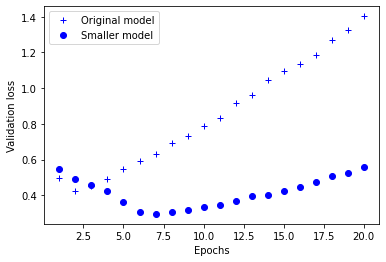

In [ ]:
import matplotlib.pyplot as plt
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 작은 채널을 가진 모델의 로스율이 더 높은 epochs에서 낮아지고 이후의 과대적합시에도 로스율은 더 작은게 보인다.
# 과대적합의 해소에 적용할수 있을듯

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 37s 741ms/step - loss: 0.5698 - accuracy: 0.7905 - val_loss: 0.3101 - val_accuracy: 0.8838
Epoch 2/20
49/49 [==============================] - 38s 789ms/step - loss: 0.2136 - accuracy: 0.9157 - val_loss: 0.3404 - val_accuracy: 0.8705
Epoch 3/20
49/49 [==============================] - 37s 766ms/step - loss: 0.1141 - accuracy: 0.9575 - val_loss: 0.7495 - val_accuracy: 0.7955
Epoch 4/20
49/49 [==============================] - 36s 742ms/step - loss: 0.0904 - accuracy: 0.9810 - val_loss: 0.4690 - val_accuracy: 0.8825
Epoch 5/20
49/49 [==============================] - 36s 736ms/step - loss: 0.1202 - accuracy: 0.9877 - val_loss: 0.4212 - val_accuracy: 0.8688
Epoch 6/20
49/49 [==============================] - 35s 716ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7044 - val_accuracy: 0.8810
Epoch 7/20
49/49 [==============================] - 36s 739ms/step - loss: 0.1336 - accuracy: 0.9864 - val_loss: 0.5374 - val_accuracy: 0.8817

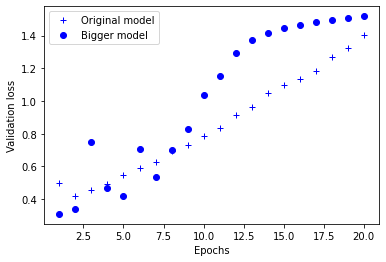

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()
# 검증모델 로스율은 불안정함과 동시에 과대적합이 더 심하게 진행된다

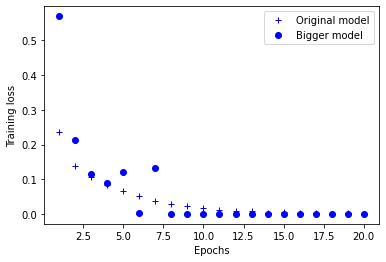

In [ ]:
original_train_loss = history.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

# 훈련 로스율은 더 빨리 0에 수렴하는게 보이므로 채널이 많은경우 더 빠른학습이 가능한것은 확인할수 있었다.

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 75ms/step - loss: 0.4936 - acc: 0.8180 - val_loss: 0.3874 - val_acc: 0.8713
Epoch 2/20
49/49 [==============================] - 2s 47ms/step - loss: 0.3162 - acc: 0.9043 - val_loss: 0.3340 - val_acc: 0.8903
Epoch 3/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2715 - acc: 0.9198 - val_loss: 0.3360 - val_acc: 0.8853
Epoch 4/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2488 - acc: 0.9293 - val_loss: 0.3350 - val_acc: 0.8860
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2357 - acc: 0.9336 - val_loss: 0.3474 - val_acc: 0.8824
Epoch 6/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2268 - acc: 0.9373 - val_loss: 0.3512 - val_acc: 0.8806
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2200 - acc: 0.9393 - val_loss: 0.3641 - val_acc: 0.8783
Epoch 8/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2160 - a

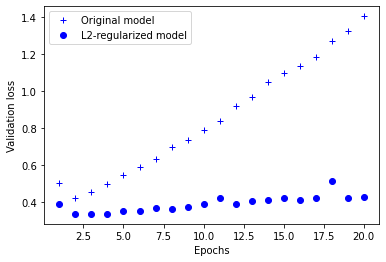

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# l2 규제의 경우 원래의 모델보다 epochs가 늘어감에 따른 로스율이 더 적다는것을 확인 가능
# 과대적합 해소에 l2규제가 사용될 수 있다고 여겨짐